## Daily Challenge: Complete Exploratory Data Analysis.

In [5]:
# Download and import the Data Science Job Salary dataset.
# Identify and differentiate between structured and unstructured data within the dataset, and discuss how this impacts your analysis approach.
# Preprocess the data by handling missing values and removing duplicates if needed.
# Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby.
# Utilize Pandas’ integration with Matplotlib to create a bar chart visualizing the average salaries for each experience level. 
# Ensure the chart includes appropriate labels, a title, and a color scheme that enhances readability.

In [1]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = r"C:\Users\Vlad\.kaggle"
os.environ['KAGGLE_CONFIG_DIR']

'C:\\Users\\Vlad\\.kaggle'

In [2]:
!kaggle datasets download -d milanvaddoriya/data-science-job-salary

Dataset URL: https://www.kaggle.com/datasets/milanvaddoriya/data-science-job-salary
License(s): other




  0%|          | 0.00/9.97k [00:00<?, ?B/s]
100%|██████████| 9.97k/9.97k [00:00<00:00, 5.09MB/s]


In [3]:
import zipfile

with zipfile.ZipFile("data-science-job-salary.zip", 'r') as f:
    f.extractall(".")

In [4]:
import pandas as pd

df = pd.read_csv('datascience_salaries.csv', index_col=0)

df.head()

,job_title,job_type,experience_level,location,salary_currency,salary
0,Data scientist,Full Time,Senior,New York City,USD,149000
2,Data scientist,Full Time,Senior,Boston,USD,120000
3,Data scientist,Full Time,Senior,London,USD,68000
4,Data scientist,Full Time,Senior,Boston,USD,120000
5,Data scientist,Full Time,Senior,New York City,USD,149000


All data in dataset is structured so we can use simple analysis techniques like such as grouping, aggregation, and statistical analysis.\
It also makes preprocessing and visualization steps easier.

### Data preprocessing

In [7]:
df.isnull().sum()

job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

In [9]:
print(df.duplicated().sum())

345


In [21]:
df.describe().round()

,salary
count,1171.0
mean,64836.0
std,32552.0
min,30000.0
25%,45000.0
50%,63000.0
75%,68000.0
max,228000.0


In [19]:
df.salary_currency.drop(['EUR', 'GBP'], inplace=True)

KeyError: "['EUR', 'GBP'] not found in axis"

There are duplicates but we should keep them as it is follows from the structure the dataset.

In [16]:
df.job_type.value_counts()

job_type
Full Time     1136
Internship      35
Name: count, dtype: int64

In [17]:
df.salary_currency.value_counts()

salary_currency
USD    1157
EUR       9
GBP       5
Name: count, dtype: int64

In [28]:
# Group by experience_level and calculate mean and median salaries
grouped_data = df.groupby('experience_level')['salary'].agg(['mean', 'median', 'std']).reset_index().round().sort_values(by='mean')
grouped_data


,experience_level,mean,median,std
0,Entry,36111.0,30000.0,16151.0
2,Mid,51787.0,51000.0,20610.0
3,Senior,75088.0,68000.0,33561.0
1,Executive,76077.0,46000.0,46861.0


In [29]:
df.groupby('experience_level')['salary'].describe().round()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
Entry,126.0,36111.0,16151.0,30000.0,30000.0,30000.0,36000.0,140000.0
Executive,13.0,76077.0,46861.0,41000.0,43000.0,46000.0,110000.0,175000.0
Mid,305.0,51787.0,20610.0,30000.0,40000.0,51000.0,51000.0,160000.0
Senior,727.0,75088.0,33561.0,30000.0,63000.0,68000.0,69000.0,228000.0


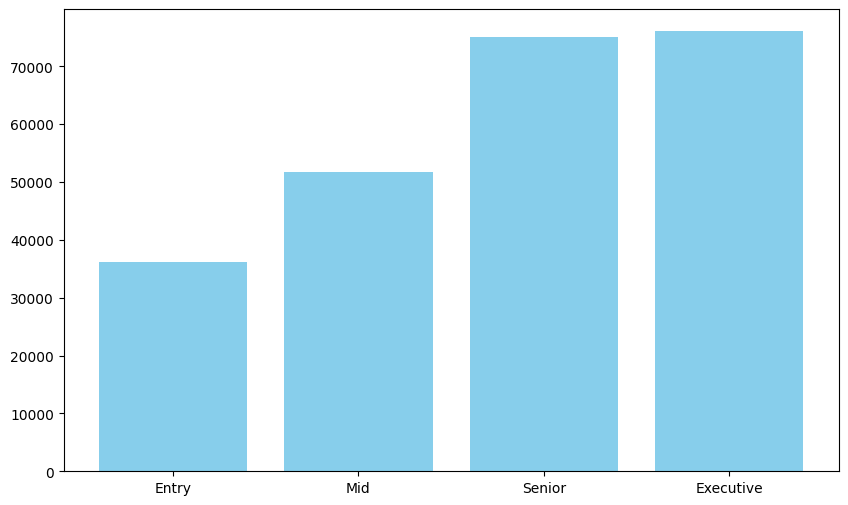

In [30]:
import matplotlib.pyplot as plt

# Create a bar chart for average salaries by experience level
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['experience_level'], grouped_data['mean'], color='skyblue')
plt.show()

<Axes: xlabel='experience_level', ylabel='salary'>

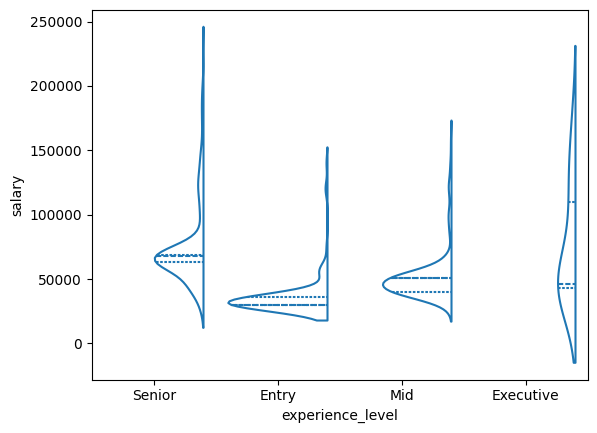

In [26]:
import seaborn as sns

sns.violinplot(data=df, x="experience_level", y="salary", split=True, inner="quart", fill=False)